<a href="https://colab.research.google.com/github/carwilfer/Projeto-IoT-e-Data-Science/blob/main/tree/main/Code/DataPrep/AE_PB_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pytz
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [21]:
df_NYC_Motor = pd.read_csv('NYC_Motor.csv')
df_NYC_Motor

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45664,2021-05-07,0:00,Injured,24.0,Back,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19988552.0,051c2721-1533-4f48-bda4-273bd3725242,NaN,Driver,Driver,11823105,NaN,4414130
45665,2021-04-27,13:00,Injured,29.0,Knee-Lower Leg Foot,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19966687.0,017e3824-4cbe-409a-ba57-e741923a60a1,NaN,Driver,Driver,11785808,NaN,4411119
45666,2021-05-07,14:00,Injured,7.0,Head,Child Restraint Only,F,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19951136.0,c70e93ff-cb5f-4e15-b888-0f17a1ede0cd,NaN,"Left rear passenger, or rear passenger on a bi...",Passenger,11758963,NaN,4415414
45667,2021-05-10,16:00,Injured,13.0,Elbow-Lower-Arm-Hand,None,F,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19991766.0,bb039a41-8563-493b-9fd1-a5bcd15fbb33,NaN,Right rear passenger or motorcycle sidecar pas...,Passenger,11828495,NaN,4415201


In [11]:
df_NYC_Motor.describe()

,PERSON_AGE,VEHICLE_ID,UNIQUE_ID,COLLISION_ID
count,45248.000000,3.909800e+04,4.566900e+04,4.566900e+04
mean,37.487646,1.999663e+07,1.183588e+07,4.431737e+06
std,81.492032,7.940981e+04,1.375828e+05,2.753403e+04
min,-971.000000,1.982197e+07,1.153725e+07,4.380715e+06
25%,25.000000,1.996078e+07,1.177289e+07,4.408781e+06
50%,34.000000,2.000877e+07,1.185680e+07,4.432358e+06
75%,48.000000,2.005868e+07,1.194421e+07,4.455395e+06
max,9999.000000,2.010992e+07,1.203146e+07,4.478832e+06


In [12]:
df_NYC_Motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRASH_DATE             45669 non-null  object 
 1   CRASH_TIME             45669 non-null  object 
 2   PERSON_INJURY          45669 non-null  object 
 3   PERSON_AGE             45248 non-null  float64
 4   BODILY_INJURY          45669 non-null  object 
 5   SAFETY_EQUIPMENT       39434 non-null  object 
 6   PERSON_SEX             45669 non-null  object 
 7   PERSON_TYPE            45669 non-null  object 
 8   PED_LOCATION           6571 non-null   object 
 9   CONTRIBUTING_FACTOR_2  6546 non-null   object 
 10  EJECTION               39429 non-null  object 
 11  COMPLAINT              45669 non-null  object 
 12  EMOTIONAL_STATUS       45669 non-null  object 
 13  VEHICLE_ID             39098 non-null  float64
 14  PERSON_ID              45669 non-null  object 
 15  CO

In [13]:
df_NYC_Motor.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [14]:
df_NYC_Motor.columns.values

array(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID',
       'CONTRIBUTING_FACTOR_1', 'POSITION_IN_VEHICLE', 'PED_ROLE',
       'UNIQUE_ID', 'PED_ACTION', 'COLLISION_ID'], dtype=object)

In [15]:
df_NYC_Motor.isnull().sum()

CRASH_DATE                   0
CRASH_TIME                   0
PERSON_INJURY                0
PERSON_AGE                 421
BODILY_INJURY                0
SAFETY_EQUIPMENT          6235
PERSON_SEX                   0
PERSON_TYPE                  0
PED_LOCATION             39098
CONTRIBUTING_FACTOR_2    39123
EJECTION                  6240
COMPLAINT                    0
EMOTIONAL_STATUS             0
VEHICLE_ID                6571
PERSON_ID                    0
CONTRIBUTING_FACTOR_1    39111
POSITION_IN_VEHICLE       6221
PED_ROLE                     0
UNIQUE_ID                    0
PED_ACTION               39098
COLLISION_ID                 0
dtype: int64

In [19]:
df_NYC_Motor.isna().sum()

CRASH_DATE                   0
CRASH_TIME                   0
PERSON_INJURY                0
PERSON_AGE                 421
BODILY_INJURY                0
SAFETY_EQUIPMENT          6235
PERSON_SEX                   0
PERSON_TYPE                  0
PED_LOCATION             39098
CONTRIBUTING_FACTOR_2    39123
EJECTION                  6240
COMPLAINT                    0
EMOTIONAL_STATUS             0
VEHICLE_ID                6571
PERSON_ID                    0
CONTRIBUTING_FACTOR_1    39111
POSITION_IN_VEHICLE       6221
PED_ROLE                     0
UNIQUE_ID                    0
PED_ACTION               39098
COLLISION_ID                 0
dtype: int64

In [20]:
df_NYC_Motor.T

,0,1,2,3,4,5,6,7,8,9,...,45659,45660,45661,45662,45663,45664,45665,45666,45667,45668
CRASH_DATE,2021-05-02,2021-05-21,2021-10-15,2021-04-17,2021-05-25,2021-04-08,2021-01-14,2021-01-20,2021-09-04,2021-05-03,...,2021-03-20,2021-04-15,2021-06-06,2021-05-10,2021-04-29,2021-05-07,2021-04-27,2021-05-07,2021-05-10,2021-11-09
CRASH_TIME,21:00,0:00,2:00,13:00,22:00,23:00,15:00,19:00,14:00,23:00,...,18:00,11:00,9:00,16:00,22:00,0:00,13:00,14:00,16:00,13:00
PERSON_INJURY,Killed,Killed,Killed,Killed,Killed,Killed,Killed,Killed,Killed,Killed,...,Injured,Injured,Injured,Injured,Injured,Injured,Injured,Injured,Injured,Injured
PERSON_AGE,62.0,24.0,30.0,71.0,69.0,43.0,81.0,60.0,52.0,21.0,...,22.0,43.0,37.0,31.0,47.0,24.0,29.0,7.0,13.0,29.0
BODILY_INJURY,Head,Entire Body,Head,Head,Entire Body,Head,Entire Body,Chest,Entire Body,Head,...,Back,Neck,Back,Elbow-Lower-Arm-Hand,Knee-Lower Leg Foot,Back,Knee-Lower Leg Foot,Head,Elbow-Lower-Arm-Hand,Shoulder - Upper Arm
SAFETY_EQUIPMENT,NaN,Air Bag Deployed,None,NaN,NaN,NaN,NaN,NaN,Unknown,Lap Belt & Harness,...,None,Lap Belt & Harness,Lap Belt & Harness,Unknown,NaN,Lap Belt & Harness,Lap Belt & Harness,Child Restraint Only,None,Lap Belt & Harness
PERSON_SEX,F,M,M,M,F,M,M,M,M,M,...,M,M,M,M,F,M,M,F,F,M
PERSON_TYPE,Pedestrian,Occupant,Occupant,Pedestrian,Pedestrian,Pedestrian,Pedestrian,Pedestrian,Occupant,Occupant,...,Occupant,Occupant,Occupant,Other Motorized,Pedestrian,Occupant,Occupant,Occupant,Occupant,Occupant
PED_LOCATION,Pedestrian/Bicyclist/Other Pedestrian at Inter...,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Not at I...,NaN,NaN,...,NaN,NaN,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,NaN,NaN,NaN,NaN,NaN
CONTRIBUTING_FACTOR_2,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,Unspecified,Unspecified,Unspecified,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Unspecified,NaN,NaN,...,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN,NaN


In [17]:
df_NYC_util = df_NYC_Motor.loc[:,["CRASH_DATE", "CRASH_TIME", "PERSON_INJURY", "PERSON_AGE", "PERSON_SEX", "PERSON_TYPE", "COMPLAINT", "EMOTIONAL_STATUS", "COLLISION_ID"]].set_index('CRASH_DATE')
df_NYC_util

,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID
CRASH_DATE,,,,,,,,
2021-05-02,21:00,Killed,62.0,F,Pedestrian,Severe Bleeding,Apparent Death,4412948
2021-05-21,0:00,Killed,24.0,M,Occupant,Internal,Apparent Death,4419608
2021-10-15,2:00,Killed,30.0,M,Occupant,Internal,Apparent Death,4467504
2021-04-17,13:00,Killed,71.0,M,Pedestrian,Internal,Unconscious,4408062
2021-05-25,22:00,Killed,69.0,F,Pedestrian,None Visible,Conscious,4420918
...,...,...,...,...,...,...,...,...
2021-05-07,0:00,Injured,24.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4414130
2021-04-27,13:00,Injured,29.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4411119
2021-05-07,14:00,Injured,7.0,F,Occupant,Complaint of Pain or Nausea,Conscious,4415414


In [26]:
df_NYC_util.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45248 entries, 2021-05-02 to 2021-11-09
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRASH_TIME        45248 non-null  object 
 1   PERSON_INJURY     45248 non-null  object 
 2   PERSON_AGE        45248 non-null  float64
 3   PERSON_SEX        45248 non-null  object 
 4   PERSON_TYPE       45248 non-null  object 
 5   COMPLAINT         45248 non-null  object 
 6   EMOTIONAL_STATUS  45248 non-null  object 
 7   COLLISION_ID      45248 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [27]:
df_NYC_util.dropna(inplace=True)

In [28]:
df_NYC_util.isna().sum()

CRASH_TIME          0
PERSON_INJURY       0
PERSON_AGE          0
PERSON_SEX          0
PERSON_TYPE         0
COMPLAINT           0
EMOTIONAL_STATUS    0
COLLISION_ID        0
dtype: int64

In [29]:
df_NYC_util.sort_values(by = 'CRASH_DATE', ascending=True)

,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID
CRASH_DATE,,,,,,,,
2021-01-01,11:00,Injured,38.0,M,Occupant,Internal,Conscious,4381163
2021-01-01,1:00,Injured,20.0,M,Pedestrian,Contusion - Bruise,Conscious,4380810
2021-01-01,4:00,Injured,21.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4381028
2021-01-01,4:00,Injured,29.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4380928
2021-01-01,6:00,Injured,18.0,F,Occupant,Complaint of Pain or Nausea,Shock,4380756
...,...,...,...,...,...,...,...,...
2021-11-16,8:00,Injured,40.0,M,Bicyclist,Complaint of Pain or Nausea,Conscious,4477923
2021-11-16,9:00,Injured,34.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4477998
2021-11-16,7:00,Injured,21.0,M,Other Motorized,Complaint of Pain or Nausea,Conscious,4478377


In [30]:
df_NYC_util.reset_index(inplace=True)
crash_datetime = df_NYC_util['CRASH_DATE'] + " "+ df_NYC_util['CRASH_TIME']
df_NYC_util["CRASH_DATETIME"] = pd.to_datetime(crash_datetime)
df_NYC_util.set_index("CRASH_DATETIME", inplace=True)
df_NYC_util

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID
CRASH_DATETIME,,,,,,,,,
2021-05-02 21:00:00,2021-05-02,21:00,Killed,62.0,F,Pedestrian,Severe Bleeding,Apparent Death,4412948
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Internal,Apparent Death,4419608
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Internal,Apparent Death,4467504
2021-04-17 13:00:00,2021-04-17,13:00,Killed,71.0,M,Pedestrian,Internal,Unconscious,4408062
2021-05-25 22:00:00,2021-05-25,22:00,Killed,69.0,F,Pedestrian,None Visible,Conscious,4420918
...,...,...,...,...,...,...,...,...,...
2021-05-07 00:00:00,2021-05-07,0:00,Injured,24.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4414130
2021-04-27 13:00:00,2021-04-27,13:00,Injured,29.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4411119
2021-05-07 14:00:00,2021-05-07,14:00,Injured,7.0,F,Occupant,Complaint of Pain or Nausea,Conscious,4415414


In [31]:
df_NYC_util.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45248 entries, 2021-05-02 21:00:00 to 2021-11-09 13:00:00
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRASH_DATE        45248 non-null  object 
 1   CRASH_TIME        45248 non-null  object 
 2   PERSON_INJURY     45248 non-null  object 
 3   PERSON_AGE        45248 non-null  float64
 4   PERSON_SEX        45248 non-null  object 
 5   PERSON_TYPE       45248 non-null  object 
 6   COMPLAINT         45248 non-null  object 
 7   EMOTIONAL_STATUS  45248 non-null  object 
 8   COLLISION_ID      45248 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 3.5+ MB


In [32]:
df_NYC_util["PERSON_INJURY"].nunique()

2

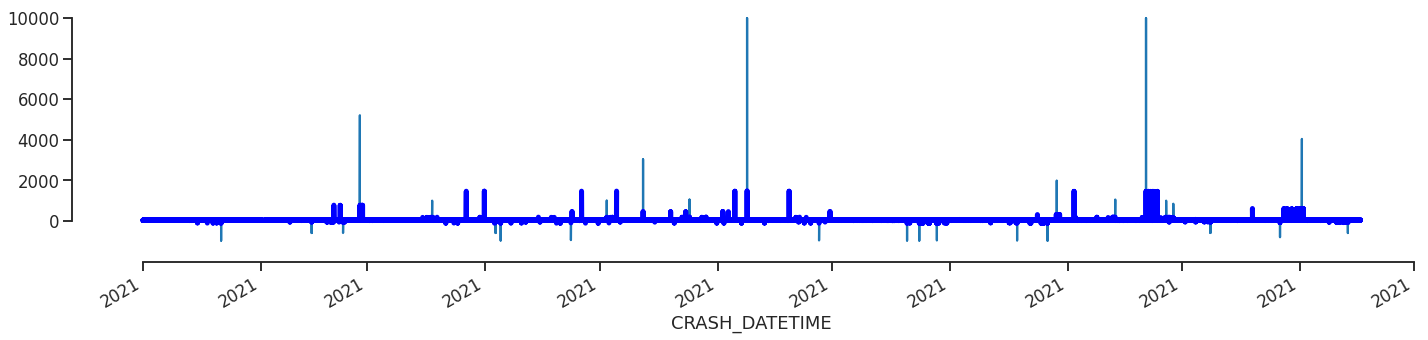

In [33]:
def plot_series(series):
    sns.set_context("talk")
    sns.set_style("ticks")

    fig, ax = plt.subplots(1, 1, figsize=(24, 5))
    ax = series.plot(ax = ax)
    ax.yaxis.grid(True)
    sns.despine(offset=10, trim=True)
    return ax

ax = plot_series(df_NYC_util.PERSON_AGE)
df_NYC_util.PERSON_AGE.rolling(7).mean().plot(ax=ax, c='b', lw=5)

In [34]:
df_NYC_sitacao = df_NYC_util['PERSON_INJURY']
df_NYC_sitacao

CRASH_DATETIME
2021-05-02 21:00:00     Killed
2021-05-21 00:00:00     Killed
2021-10-15 02:00:00     Killed
2021-04-17 13:00:00     Killed
2021-05-25 22:00:00     Killed
                        ...   
2021-05-07 00:00:00    Injured
2021-04-27 13:00:00    Injured
2021-05-07 14:00:00    Injured
2021-05-10 16:00:00    Injured
2021-11-09 13:00:00    Injured
Name: PERSON_INJURY, Length: 45248, dtype: object

In [35]:
df_NYC_util.iloc[:,4]

CRASH_DATETIME
2021-05-02 21:00:00    F
2021-05-21 00:00:00    M
2021-10-15 02:00:00    M
2021-04-17 13:00:00    M
2021-05-25 22:00:00    F
                      ..
2021-05-07 00:00:00    M
2021-04-27 13:00:00    M
2021-05-07 14:00:00    F
2021-05-10 16:00:00    F
2021-11-09 13:00:00    M
Name: PERSON_SEX, Length: 45248, dtype: object

In [38]:
label_encoder_teste = LabelEncoder()
df_NYC_util.iloc[:,2]
df_NYC_util.iloc[:,4]
teste = label_encoder_teste.fit_transform(df_NYC_util.iloc[:,2])
teste_2 = label_encoder_teste.fit_transform(df_NYC_util.iloc[:,4])

In [39]:
teste

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
teste_2

array([0, 1, 1, ..., 0, 0, 1])

In [41]:
df_NYC_util["PERSON_INJURY_BIN"] = teste
df_NYC_util["PERSON_SEX_BIN"] = teste_2
df_NYC_util

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,
2021-05-02 21:00:00,2021-05-02,21:00,Killed,62.0,F,Pedestrian,Severe Bleeding,Apparent Death,4412948,1,0
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Internal,Apparent Death,4419608,1,1
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Internal,Apparent Death,4467504,1,1
2021-04-17 13:00:00,2021-04-17,13:00,Killed,71.0,M,Pedestrian,Internal,Unconscious,4408062,1,1
2021-05-25 22:00:00,2021-05-25,22:00,Killed,69.0,F,Pedestrian,None Visible,Conscious,4420918,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07 00:00:00,2021-05-07,0:00,Injured,24.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4414130,0,1
2021-04-27 13:00:00,2021-04-27,13:00,Injured,29.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4411119,0,1
2021-05-07 14:00:00,2021-05-07,14:00,Injured,7.0,F,Occupant,Complaint of Pain or Nausea,Conscious,4415414,0,0


In [42]:
df_NYC_util.sort_values(by = 'CRASH_DATE', ascending=True)

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,
2021-01-01 11:00:00,2021-01-01,11:00,Injured,38.0,M,Occupant,Internal,Conscious,4381163,0,1
2021-01-01 01:00:00,2021-01-01,1:00,Injured,20.0,M,Pedestrian,Contusion - Bruise,Conscious,4380810,0,1
2021-01-01 04:00:00,2021-01-01,4:00,Injured,21.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4381028,0,1
2021-01-01 04:00:00,2021-01-01,4:00,Injured,29.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4380928,0,1
2021-01-01 06:00:00,2021-01-01,6:00,Injured,18.0,F,Occupant,Complaint of Pain or Nausea,Shock,4380756,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 08:00:00,2021-11-16,8:00,Injured,40.0,M,Bicyclist,Complaint of Pain or Nausea,Conscious,4477923,0,1
2021-11-16 09:00:00,2021-11-16,9:00,Injured,34.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4477998,0,1
2021-11-16 07:00:00,2021-11-16,7:00,Injured,21.0,M,Other Motorized,Complaint of Pain or Nausea,Conscious,4478377,0,1


In [43]:
df_NYC_util.PERSON_SEX

CRASH_DATETIME
2021-05-02 21:00:00    F
2021-05-21 00:00:00    M
2021-10-15 02:00:00    M
2021-04-17 13:00:00    M
2021-05-25 22:00:00    F
                      ..
2021-05-07 00:00:00    M
2021-04-27 13:00:00    M
2021-05-07 14:00:00    F
2021-05-10 16:00:00    F
2021-11-09 13:00:00    M
Name: PERSON_SEX, Length: 45248, dtype: object

In [44]:
df_NYC_util["PERSON_SEX"].nunique()

3

In [45]:
df_NYC_util_FM = df_NYC_util[(df_NYC_util.PERSON_SEX == 'F') | (df_NYC_util.PERSON_SEX == 'M')]
df_NYC_util_FM

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,
2021-05-02 21:00:00,2021-05-02,21:00,Killed,62.0,F,Pedestrian,Severe Bleeding,Apparent Death,4412948,1,0
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Internal,Apparent Death,4419608,1,1
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Internal,Apparent Death,4467504,1,1
2021-04-17 13:00:00,2021-04-17,13:00,Killed,71.0,M,Pedestrian,Internal,Unconscious,4408062,1,1
2021-05-25 22:00:00,2021-05-25,22:00,Killed,69.0,F,Pedestrian,None Visible,Conscious,4420918,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07 00:00:00,2021-05-07,0:00,Injured,24.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4414130,0,1
2021-04-27 13:00:00,2021-04-27,13:00,Injured,29.0,M,Occupant,Complaint of Pain or Nausea,Conscious,4411119,0,1
2021-05-07 14:00:00,2021-05-07,14:00,Injured,7.0,F,Occupant,Complaint of Pain or Nausea,Conscious,4415414,0,0


In [46]:
df_NYC_util_FM.drop(df_NYC_util_FM[df_NYC_util_FM.PERSON_AGE > 100].index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df_NYC_util_FM.drop(df_NYC_util_FM[df_NYC_util_FM.PERSON_AGE <= 0].index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


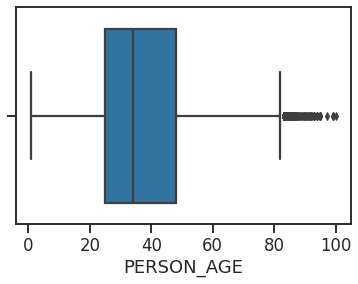

In [48]:
sns.boxplot(df_NYC_util_FM['PERSON_AGE'])

In [49]:
df_NYC_util_FM_Plot = px.box(df_NYC_util_FM, y='PERSON_AGE')
df_NYC_util_FM_Plot.show()

In [50]:
df_NYC_util_Graf_2 = pd.DataFrame(df_NYC_util.resample('W')['PERSON_INJURY_BIN'].sum())
df_NYC_util_Graf_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-01-03 to 2021-11-21
Freq: W-SUN
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PERSON_INJURY_BIN  47 non-null     int64
dtypes: int64(1)
memory usage: 752.0 bytes


In [51]:
df_NYC_util_Graf_3 = pd.DataFrame(df_NYC_util.resample('W')['PERSON_SEX_BIN'].sum())
df_NYC_util_Graf_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-01-03 to 2021-11-21
Freq: W-SUN
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PERSON_SEX_BIN  47 non-null     int64
dtypes: int64(1)
memory usage: 752.0 bytes


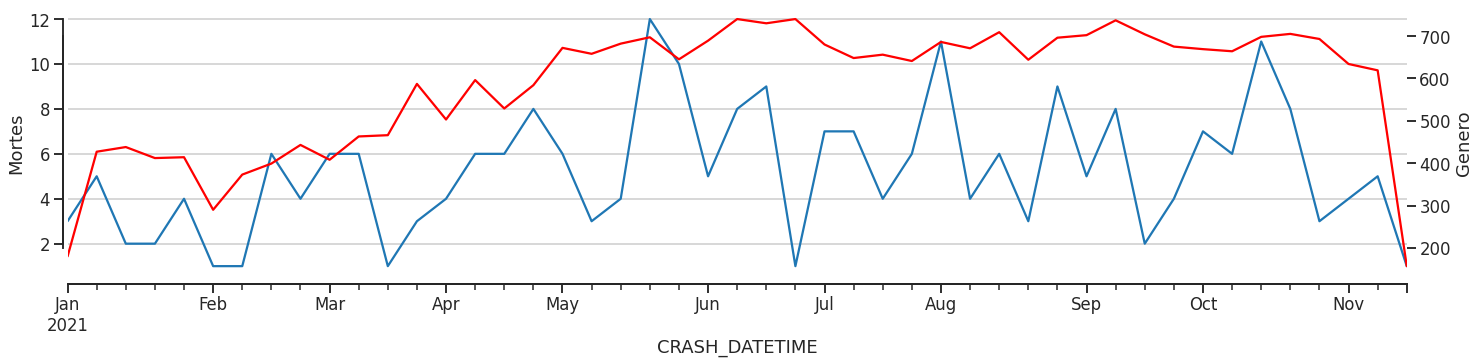

In [52]:
ax = plot_series(df_NYC_util_Graf_2.PERSON_INJURY_BIN)
ax.set_ylabel("Mortes")
ax2 = ax.twinx()

df_NYC_util_Graf_3.PERSON_SEX_BIN.plot(ax=ax2, c="r")
ax2.set_ylabel("Genero")

sns.despine(trim=True, offset=5)


In [53]:
df_graf = df_NYC_util_FM.groupby(['CRASH_DATE', 'PERSON_INJURY', 'PERSON_SEX'])['PERSON_AGE'].agg('mean')
df_graf

CRASH_DATE  PERSON_INJURY  PERSON_SEX
2021-01-01  Injured        F             38.725000
                           M             32.578125
            Killed         F             60.000000
                           M             57.000000
2021-01-02  Injured        F             35.605263
                                           ...    
2021-11-15  Injured        F             40.142857
                           M             38.500000
2021-11-16  Injured        F             34.212766
                           M             37.555556
            Killed         M             80.000000
Name: PERSON_AGE, Length: 829, dtype: float64

In [54]:
df_NYC_util_FM['PERSON_AGE'].max()

100.0

In [55]:
df_NYC_util_FM_copy = df_NYC_util_FM[df_NYC_util_FM['PERSON_INJURY'] == 'Killed']
df_NYC_util_FM_copy

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Internal,Apparent Death,4419608,1,1
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Internal,Apparent Death,4467504,1,1
2021-04-17 13:00:00,2021-04-17,13:00,Killed,71.0,M,Pedestrian,Internal,Unconscious,4408062,1,1
2021-05-25 22:00:00,2021-05-25,22:00,Killed,69.0,F,Pedestrian,None Visible,Conscious,4420918,1,0
2021-04-08 23:00:00,2021-04-08,23:00,Killed,43.0,M,Pedestrian,Internal,Unconscious,4407069,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 04:00:00,2021-07-28,4:00,Killed,32.0,M,Occupant,Severe Bleeding,Apparent Death,4441354,1,1
2021-09-02 10:00:00,2021-09-02,10:00,Killed,62.0,F,Pedestrian,Crush Injuries,Apparent Death,4453656,1,0
2021-05-22 04:00:00,2021-05-22,4:00,Killed,28.0,M,Occupant,Crush Injuries,Unconscious,4419561,1,1


In [56]:
df_NYC_util_FM_copy['PERSON_INJURY'].count()

243

In [57]:
fig = px.line(df_graf.reset_index(), x='CRASH_DATE', y='PERSON_AGE', title='Histórico de mortes por idade', color='PERSON_SEX')
fig.show()

In [58]:
df_kill = df_graf.reset_index(inplace=False)
#df_kill.set_index('CRASH_DATE', inplace=True)
df_kill_fem = df_kill[(df_kill.PERSON_SEX == 'F')]
df_kill_fem

,CRASH_DATE,PERSON_INJURY,PERSON_SEX,PERSON_AGE
0,2021-01-01,Injured,F,38.725000
2,2021-01-01,Killed,F,60.000000
4,2021-01-02,Injured,F,35.605263
7,2021-01-03,Injured,F,33.489362
9,2021-01-04,Injured,F,41.075000
...,...,...,...,...
818,2021-11-13,Injured,F,35.740741
820,2021-11-14,Injured,F,38.041667
822,2021-11-14,Killed,F,56.000000
824,2021-11-15,Injured,F,40.142857


In [59]:
df_kill_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 826
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRASH_DATE     377 non-null    object 
 1   PERSON_INJURY  377 non-null    object 
 2   PERSON_SEX     377 non-null    object 
 3   PERSON_AGE     377 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.7+ KB


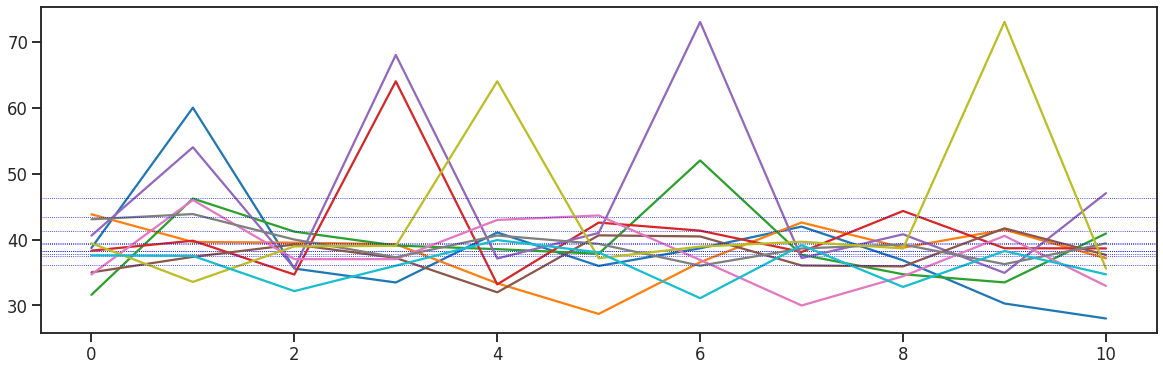

In [63]:
fig, ax = plt.subplots(1, 1, figsize= (20, 6))

for idx in range(10):
    from_date = (idx * 12 )
    to_date = ((idx+1) * 12 - 1)
    values = df_kill_fem["PERSON_AGE"].iloc[from_date:to_date ].values
    ax.plot(values)
    ax.axhline(y=np.mean(values), color="b", lw=.8, ls=":")